IndexError: list index out of range

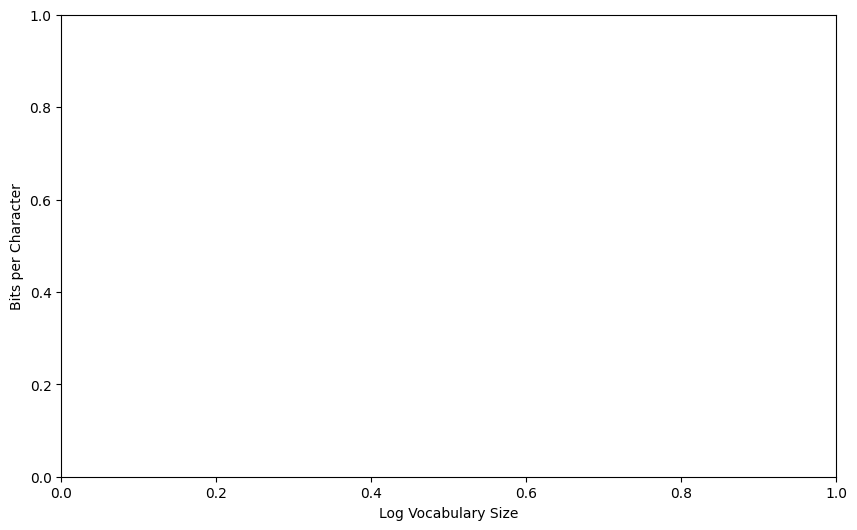

In [3]:
from plot import plot_bpc_vs_vocab_size

base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9

pkl_dir = "."
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = False,
                       title = "Scaling Vocabulary Curriculum Learning")

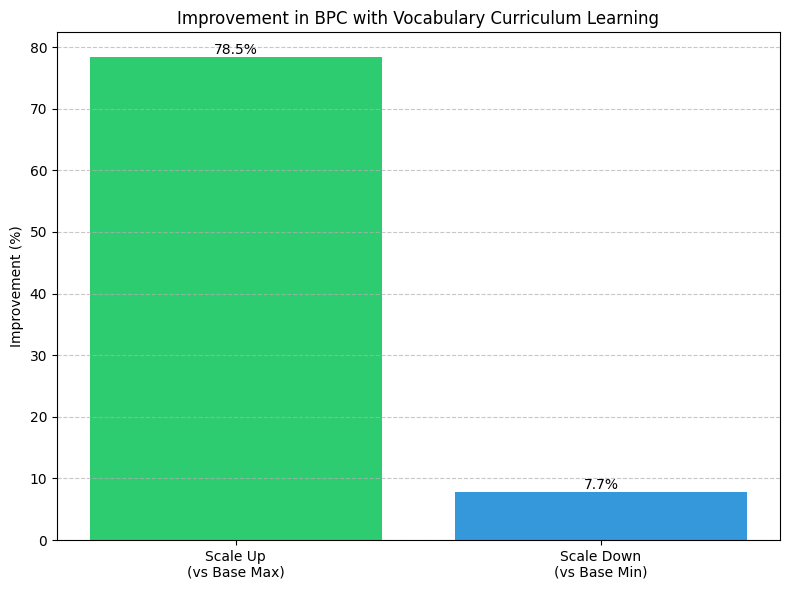

In [4]:
base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9
scale_up_max_vocab_bpc = 1.9154
scale_down_min_vocab_bpc = 1.5687

import matplotlib.pyplot as plt
import numpy as np

# Calculate improvements
scale_up_improvement = ((base_max_vocab_bpc - scale_up_max_vocab_bpc) / base_max_vocab_bpc) * 100
scale_down_improvement = ((base_min_vocab_bpc - scale_down_min_vocab_bpc) / base_min_vocab_bpc) * 100

# Define the data
improvements = {
    'Scale Up\n(vs Base Max)': scale_up_improvement,
    'Scale Down\n(vs Base Min)': scale_down_improvement
}

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(improvements.keys(), improvements.values(), color=['#2ecc71', '#3498db'])

# Customize the plot
plt.title('Improvement in BPC with Vocabulary Curriculum Learning', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

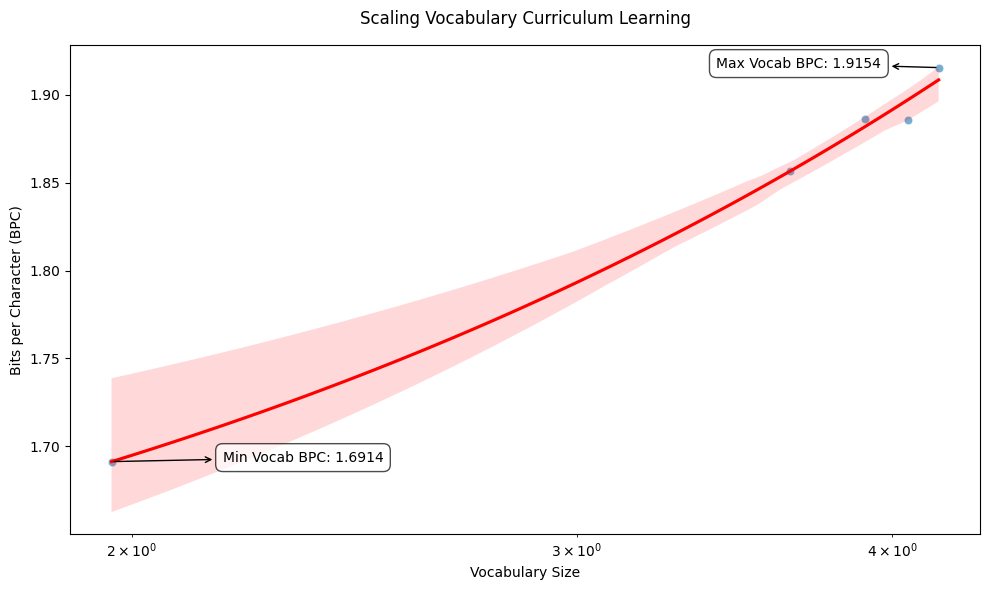

In [2]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run1"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

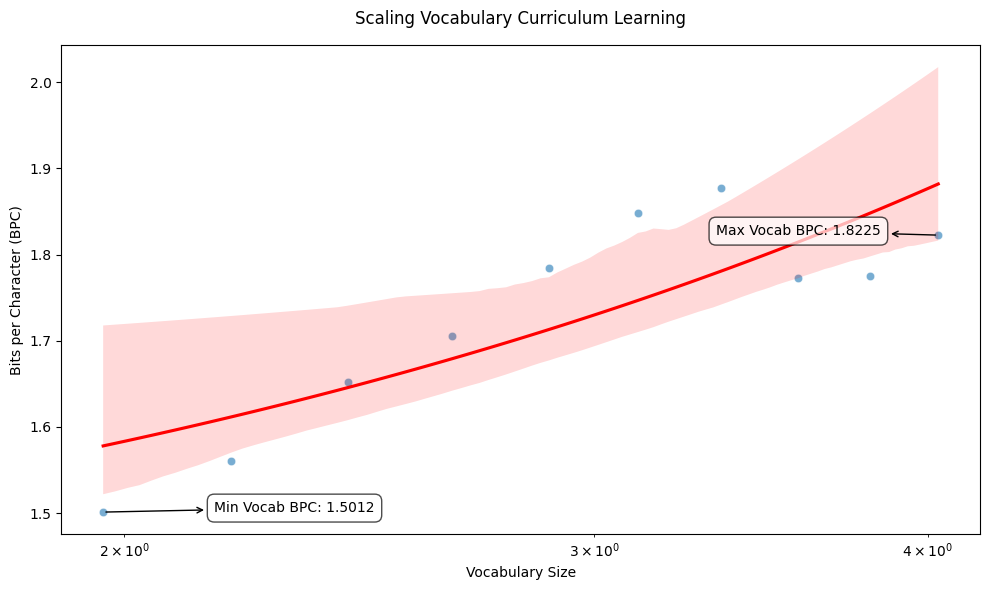

In [1]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run3"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

# the 3rd run also demonstrate the 'occilation' on BPC between 1.5 ~ 1.7 for the base vocabulary set-ups

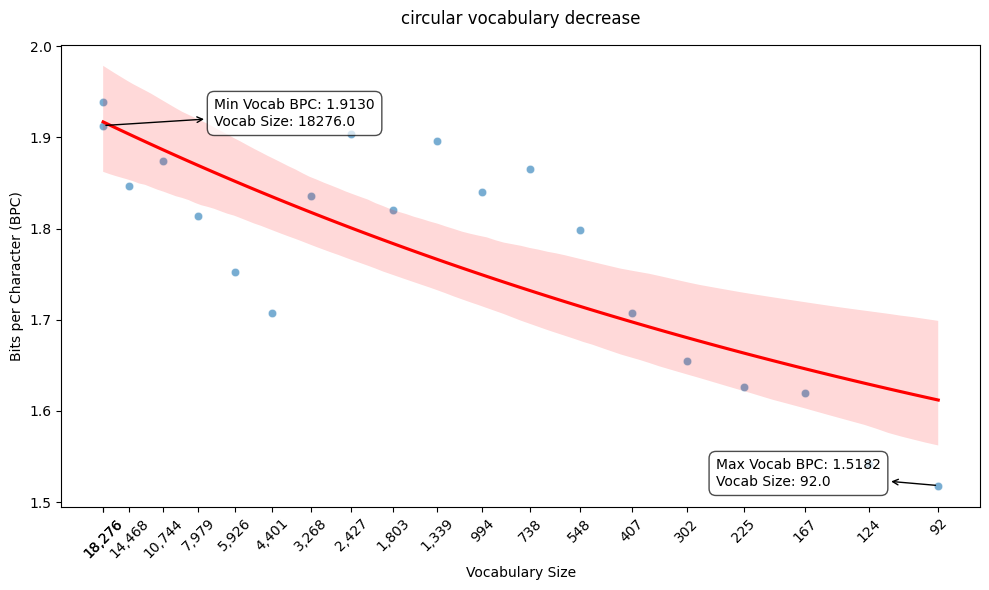

In [5]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=False, title="circular vocabulary decrease")

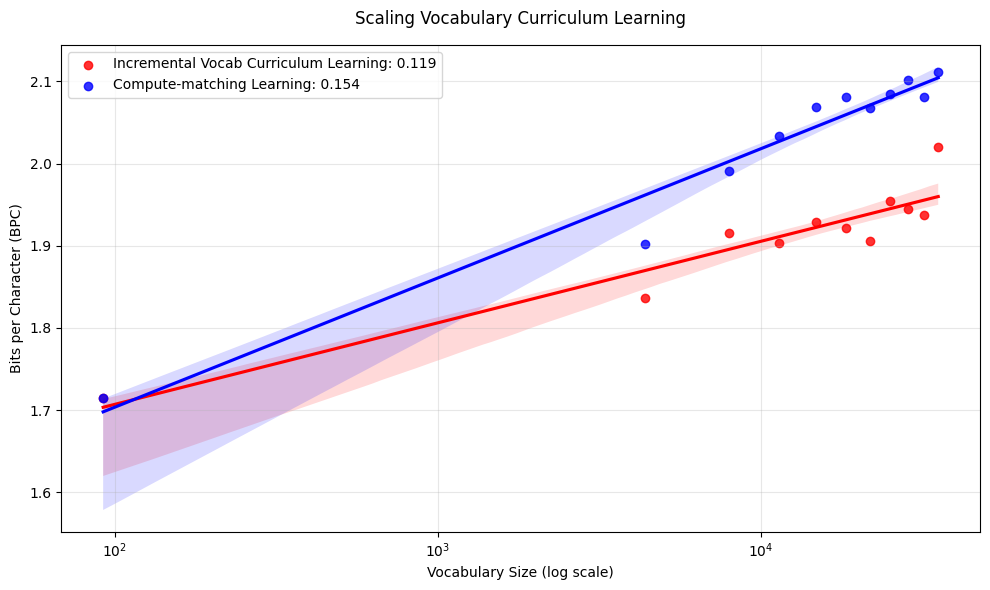

In [2]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab_comparison
import pandas as pd

data = {}
pkl_dir = "../run5"
pkl_path = pkl_dir + "/increase*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
data["incre_vocab_curriculum"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    
pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/increase*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)    
    
data["compute_matching"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    

slope = _plot_bpc_vs_vocab_comparison(data, bpcs, increase_vocab_size=True, title="Scaling Vocabulary Curriculum Learning")


In [4]:
data['incre_vocab_curriculum']

{'vocab_sizes': [92,
  124,
  167,
  2427,
  3268,
  5926,
  4401,
  7979,
  10744,
  18276,
  14468,
  18276,
  407,
  548,
  302,
  225,
  738,
  994,
  1803,
  1339],
 'bpcs': [1.5182369947433472,
  1.5414396524429321,
  1.6194331645965576,
  1.9033781290054321,
  1.8357903957366943,
  1.7524908781051636,
  1.7071272134780884,
  1.8137433528900146,
  1.874107837677002,
  1.9385912418365479,
  1.8464628458023071,
  1.9130115509033203,
  1.7077045440673828,
  1.7981464862823486,
  1.6550776958465576,
  1.6266005039215088,
  1.8657078742980957,
  1.840469241142273,
  1.8203532695770264,
  1.8961224555969238]}

In [5]:
data['compute_matching']

{'vocab_sizes': [225,
  302,
  2427,
  3268,
  14468,
  18276,
  10744,
  7979,
  1803,
  1339,
  18276,
  548,
  407,
  92,
  738,
  994,
  124,
  167,
  4401,
  5926],
 'bpcs': [1.6440823078155518,
  1.646000623703003,
  1.8845767974853516,
  1.938866138458252,
  1.9902162551879883,
  1.9977314472198486,
  1.969947338104248,
  1.8623316287994385,
  1.8549433946609497,
  1.9113085269927979,
  2.008716106414795,
  1.7897956371307373,
  1.7343688011169434,
  1.5062240362167358,
  1.8530313968658447,
  1.8582851886749268,
  1.5535953044891357,
  1.6157413721084595,
  1.7995805740356445,
  1.8406398296356201]}

In [8]:
vocab_sizes[5], bpcs[5]

(18276, 1.9977314472198486)

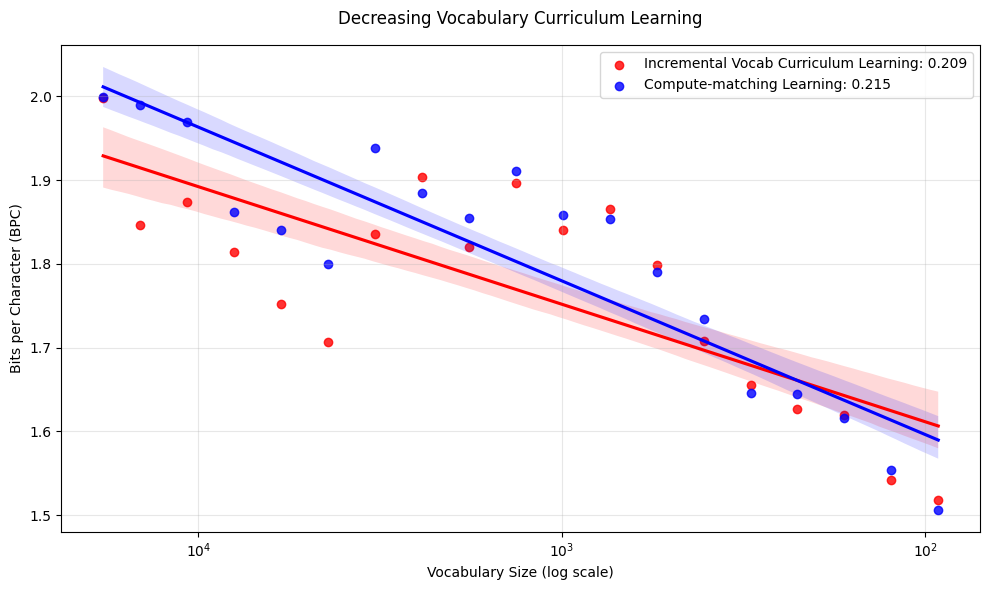

In [2]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab_comparison
import pandas as pd

data = {}
pkl_dir = "../run5"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
        if vocab_size == 18276: 
            bpc = 1.9977314472198486
        if vocab_size in vocab_sizes: 
            continue 
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
data["decre_vocab_curriculum"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    
pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
        if vocab_size == 18276: 
            bpc = 1.9997314472198486
        if vocab_size in vocab_sizes: 
            continue 
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)    
    
data["compute_matching"] = {"vocab_sizes": vocab_sizes, "bpcs": bpcs}
    

slope = _plot_bpc_vs_vocab_comparison(data, bpcs, increase_vocab_size=False, title="Decreasing Vocabulary Curriculum Learning")


In [9]:
# info['incre_vocab_curriculum']
info.keys()

dict_keys(['run_idx', 'bpc', 'model_type', 'config', 'compute_matching'])

In [2]:
slope

0.09926634685870746

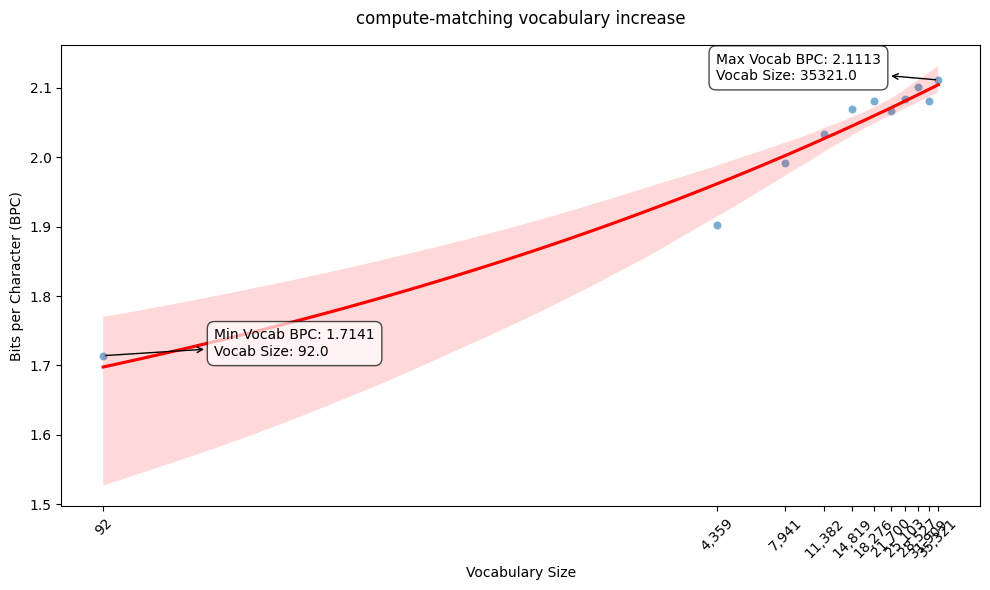

In [4]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/increase*.pkl"
vocab_sizes = [92]
bpcs = [1.7141]
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
slope = _plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=True, title="compute-matching vocabulary increase")

In [6]:
slope
# - change x-axis ticks into '10^xx' to illustrate log linear relationship 
# - plot the curriculum incremental learning curve together with compute-matching curve 


0.15737105324245354

In [10]:
vocab_sizes, bpcs

([92, 4359, 25103, 21700, 11382, 7941, 31909, 28527, 35321, 14819, 18276],
 [1.7141,
  1.902695894241333,
  2.084137439727783,
  2.067214012145996,
  2.0338425636291504,
  1.9911859035491943,
  2.0811402797698975,
  2.1014785766601562,
  2.1113409996032715,
  2.0691614151000977,
  2.0813817977905273])

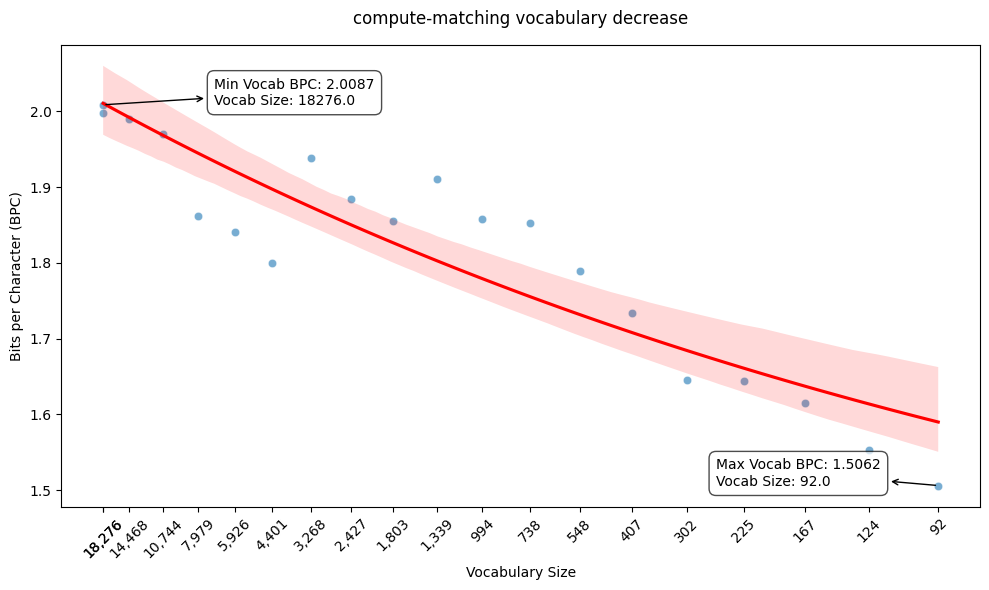

In [5]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5_cm"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=False, title="compute-matching vocabulary decrease")

In [6]:
import glob 
import pickle 

pkl_path = "../run4/*_min_vocab.pkl"
pkl_path = glob.glob(pkl_path)[0]

with open(pkl_path, "rb") as f:
    info = pickle.load(f)


In [7]:
info

{'run_idx': 0,
 'bpc': tensor(1.6474),
 'model_type': 'GPT',
 'config': {'n_layer': 6,
  'n_head': 6,
  'n_embd': 384,
  'block_size': 512,
  'bias': False,
  'vocab_size': 92,
  'dropout': 0.2}}

In [8]:
0.1474 / 1.6474

0.08947432317591357

In [5]:
# min-vocab (92) 30k training iterations 
# 1. fixed vocabulary training: 1.6474
# 2. circulary vocabulary learning: 1.50
# 3. decreasing vocabulary learning: 1.568

# max-vocab (18434) 30k training iterations 
# 1. fixed vocabulary training: 2.0356
# 2. increasing vocabulary learning: 1.9022